<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/8_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install whit_phys_util 1>/dev/null

In [22]:
import whit_phys_util as buc
import sympy as sp
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [23]:
repo = buc.local_repository('https://github.com/jhildebrand22/HW-PS353')

Cloning repository from GitHub.


In [24]:
sp.var('r m l k');
params = {m:1, l:1, k:1}
E = -0.1

## a) Find the value of $r_0$ where $U_{eff}$ is a minimum and plot.

In [25]:
F = -k/r**(5/2)
U_r = -sp.integrate(F,r)
U_eff = U_r + l**2/(2*m*r**2)
dUdr = sp.diff(U_eff,r)
r_0 = sp.solve(dUdr,r)

In [26]:
print(f"The value at which the effective potential is a minimum is {r_0}, which in our system of units means r_0 = 1.0")

The value at which the effective potential is a minimum is [l**4/(k**2*m**2)], which in our system of units means r_0 = 1.0


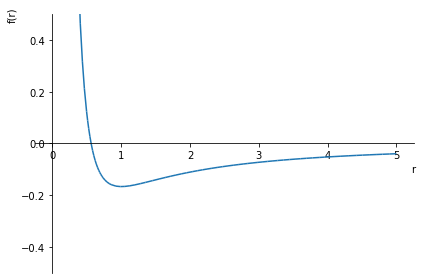

In [27]:
r_n = np.linspace(0,5,501)
fig1 = sp.plot(U_eff.subs(params), (r,0,5),ylim=[-0.5,0.5])

## b) Assuming $E=-0.1$, find an accurate value of $r_{min}$


In [28]:
r_m = sp.solve(U_eff.subs(params)-E,r)
r_min = r_m[0]
print(f"The particle's distance of closest approach is {r_min:.3f} m")

The particle's distance of closest approach is 0.667 m


## c) Find the orbit diagram

In [29]:
r_min = float(r_min)

In [30]:
def dwdt(phi,w):
  u = w[0]
  u_p = w[1]
  u_pp = -u + (u**(1/2))
  return [u_p,u_pp]

In [31]:
phi0 = [1/r_min, 0]
phi_span = [0,7*np.pi]
solu = solve_ivp(dwdt, phi_span, phi0,t_eval=np.linspace(0,7*np.pi,501))

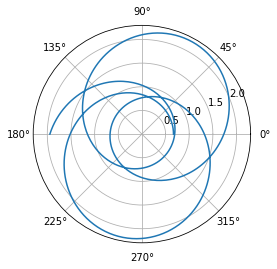

In [32]:
fig,ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(solu.t, 1/solu.y[0]);

The orbit does not appear to be closed. 